# Creative Level Models - KPI Rates: Random Forest

This notebook is to build a creative level predictive model for awareness, consideration and intent rates, using the creative elements as predictors.

In [1]:
import numpy as np, pandas as pd, os, matplotlib.pyplot as plt
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)
%matplotlib inline

In [2]:
df_raw = pd.read_csv(r"G:\My Drive\Creative_Meta_Analysis\Wave_2\SUMMARY_4.csv")

## Data Prep

In [3]:
df_raw.head()

,SID,Creative_Name,aware,cons,purch,enjoy,brand,rel,b_appeal,aware_base,cons_base,purch_base,gender,north_america,emea,apac,mobile,desktop,s06,s15,s30,age_30,age_45,p_low,p_high,pro_nexus,pro_android_os,pro_chromebook,pro_chromecast_aud,pro_chromecast,pro_google_play,pro_youtube_red,pro_youtube_music,pro_google_user,pro_google_photos,pro_g_suite,pro_pixel,pro_daydream,pro_android_pay,pro_google_home,pro_gsa,pro_google_assist,pro_youtube_tv,pro_android_wear,pro_fi,pro_youtube,pro_google_cloud,pro_google_express,pro_digital_skills,pro_feed,pro_google_home_mini,pro_duo,pro_ellen,pro_pixelbook,pro_google_duo,pro_pixel_2,pro_watercooler,pro_google_home_max,Real_World,Story_Driven,Event,Google_Logo_Upfront_Recode,Product_Logo_Upfront_Recode,Audio_Mention_Upfront_Recode,No_of_Visuals_Recode,Google_Logo_50,Product_Logo_50,Product_Shot_50,Text_on_End_Card,Demo,Front_Card,End_Card,Pop_Culture,Visually_Text_Only,Music,Voiceover,No_Product_Msgs_Recode
0,266344,Nexus5AvailableNow15sec=266344B (Test),0.478548,0.283828,0.369637,0.495050,0.693069,0.749175,0.577558,0.310000,0.18,0.36,0.287129,1,0,0,0,1,0,1,0,0.679868,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,animated,no,no,Zero,1+,Zero,Zero,no,yes,yes,yes,yes,yes,yes,no,No,yes,no,Zero
1,266344,Nexus5XAvailableNow30sec=266344A (Test),0.544262,0.295082,0.432787,0.619672,0.780328,0.868852,0.704918,0.310000,0.18,0.36,0.268852,1,0,0,0,1,0,0,1,0.678689,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,animated,no,no,Zero,1+,Zero,One+,no,yes,yes,yes,yes,yes,yes,no,No,yes,no,Two+
2,266344,Nexus6PAvailableNow30Sec=266344C (Test),0.590164,0.347541,0.445902,0.577049,0.793443,0.862295,0.714754,0.310000,0.18,0.36,0.340984,1,0,0,0,1,0,0,1,0.681967,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,animated,no,no,Zero,1+,Zero,Zero,no,yes,yes,yes,yes,yes,yes,no,No,yes,no,Two+
3,268118,Android Disco 30sec,0.923333,NaN,NaN,0.676667,0.756667,0.870000,0.676667,0.906667,NaN,NaN,0.326667,1,0,0,0,1,0,0,1,0.663333,0.0,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,real world,no,no,1+,Zero,Zero,Zero,no,no,yes,yes,yes,yes,yes,no,No,yes,no,Two+
4,268118,Android Fog 30sec,0.920530,NaN,NaN,0.658940,0.751656,0.850993,0.639073,0.906667,NaN,NaN,0.284768,1,0,0,0,1,0,0,1,0.652318,0.0,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,real world,yes,no,1+,1+,Zero,Zero,no,no,yes,yes,yes,yes,yes,no,No,yes,yes,One


In [4]:
df_raw.shape

(434, 77)

In [5]:
df_raw.columns

Index(['SID', 'Creative_Name', 'aware', 'cons', 'purch', 'enjoy', 'brand',
       'rel', 'b_appeal', 'aware_base', 'cons_base', 'purch_base', 'gender',
       'north_america', 'emea', 'apac', 'mobile', 'desktop', 's06', 's15',
       's30', 'age_30', 'age_45', 'p_low', 'p_high', 'pro_nexus',
       'pro_android_os', 'pro_chromebook', 'pro_chromecast_aud',
       'pro_chromecast', 'pro_google_play', 'pro_youtube_red',
       'pro_youtube_music', 'pro_google_user', 'pro_google_photos',
       'pro_g_suite', 'pro_pixel', 'pro_daydream', 'pro_android_pay',
       'pro_google_home', 'pro_gsa', 'pro_google_assist', 'pro_youtube_tv',
       'pro_android_wear', 'pro_fi', 'pro_youtube', 'pro_google_cloud',
       'pro_google_express', 'pro_digital_skills', 'pro_feed',
       'pro_google_home_mini', 'pro_duo', 'pro_ellen', 'pro_pixelbook',
       'pro_google_duo', 'pro_pixel_2', 'pro_watercooler',
       'pro_google_home_max', 'Real_World', 'Story_Driven', 'Event',
       'Google_Logo_Upfront_Re

In [6]:
df = df_raw[[
    'aware', 
    'cons', 
    'purch', 
    
    'north_america', 
    'emea', 
    'apac', 
    'mobile', 
    'desktop', 
    's06',
    's15', 
    's30',
    'pro_nexus', 
    'pro_android_os',   
    'pro_chromebook', 
    'pro_chromecast_aud', 
    'pro_chromecast',
    'pro_google_play', 
    'pro_youtube_red', 
    'pro_youtube_music',
    'pro_google_user', 
    'pro_google_photos', 
    'pro_g_suite', 
    'pro_pixel',
    'pro_daydream', 
    'pro_android_pay', 
    'pro_google_home', 
    'pro_gsa',
    'pro_google_assist', 
    'pro_youtube_tv', 
    'pro_android_wear', 
    'pro_fi',
    'pro_youtube', 
    'pro_google_cloud', 
    'pro_google_express',
    'pro_digital_skills', 
    'pro_feed',
    'pro_google_home_mini', 
    'pro_duo',
    'pro_ellen', 
    'pro_pixelbook', 
    'pro_google_duo', 
    'pro_pixel_2',
    'pro_watercooler', 
    'pro_google_home_max', 
    
    'Real_World', 
    'Story_Driven',
    'Event', 
    'Google_Logo_Upfront_Recode', 
    'Product_Logo_Upfront_Recode',
    'Audio_Mention_Upfront_Recode', 
    'No_of_Visuals_Recode',
    'Google_Logo_50', 
    'Product_Logo_50', 
    'Product_Shot_50',
    'Text_on_End_Card', 
    'Demo', 
    'Front_Card', 
    'Pop_Culture',
    'Music', 
    'Voiceover', 
    'No_Product_Msgs_Recode'
]]

In [7]:
df = pd.get_dummies(df, columns = [
    'Real_World', 
    'Story_Driven',
    'Event', 
    'Google_Logo_Upfront_Recode', 
    'Product_Logo_Upfront_Recode',
    'Audio_Mention_Upfront_Recode', 
    'No_of_Visuals_Recode',
    'Google_Logo_50', 
    'Product_Logo_50', 
    'Product_Shot_50',
    'Text_on_End_Card', 
    'Demo', 
    'Front_Card', 
    'Pop_Culture',
    'Music', 
    'Voiceover', 
    'No_Product_Msgs_Recode'
])

## Model KPI Rates

### Awareness

In [103]:
df_aware = df.drop(axis=1, columns=['cons', 'purch']).dropna()
X = df_aware.drop(axis=1, columns=['aware'])
y_aware = df_aware['aware']

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_aware, test_size=0.2, random_state=42)

In [105]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params = [{
    'n_estimators': [22, 23, 24],
    'max_depth': [20, 25, 30],
    'max_features': ['auto'] 
}]

rf_aware = RandomForestRegressor(random_state=42)
rf_grid_aware = GridSearchCV(rf_aware, params)
rf_grid_aware.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=42, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [22, 23, 24], 'max_depth': [20, 25, 30], 'max_features': ['auto']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [106]:
pd.DataFrame(rf_grid_aware.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.063249,0.005543,0.791009,0.986078,20,auto,22,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",9,0.869134,0.985161,0.696475,0.985588,0.806702,0.987486,0.013215,0.007142,0.071404,0.001011
1,0.062507,0.000000,0.791562,0.987963,20,auto,23,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",7,0.869692,0.987133,0.697196,0.987422,0.807082,0.989332,0.012759,0.000000,0.071320,0.000976
2,0.052089,0.000000,0.791505,0.989491,20,auto,24,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",8,0.869763,0.988736,0.696890,0.988908,0.807145,0.990828,0.007366,0.000000,0.071485,0.000948
3,0.060042,0.000336,0.797839,0.986290,25,auto,22,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",3,0.887562,0.985748,0.696475,0.985588,0.808657,0.987533,0.008545,0.000475,0.078442,0.000881
4,0.052099,0.000000,0.798415,0.988136,25,auto,23,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",2,0.888208,0.987615,0.697196,0.987422,0.809016,0.989370,0.007360,0.000000,0.078397,0.000876
5,0.059807,0.000334,0.798604,0.989631,25,auto,24,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",1,0.888908,0.989128,0.696890,0.988908,0.809185,0.990858,0.006924,0.000472,0.078804,0.000872
6,0.060517,0.000000,0.792155,0.986348,30,auto,22,"{'max_depth': 30, 'max_features': 'auto', 'n_e...",6,0.870614,0.985921,0.696475,0.985588,0.808657,0.987533,0.002791,0.000000,0.072091,0.000849
7,0.066460,0.000000,0.792589,0.988183,30,auto,23,"{'max_depth': 30, 'max_features': 'auto', 'n_e...",5,0.870838,0.987756,0.697196,0.987422,0.809016,0.989370,0.002850,0.000000,0.071883,0.000851
8,0.081411,0.000335,0.792646,0.989669,30,auto,24,"{'max_depth': 30, 'max_features': 'auto', 'n_e...",4,0.871143,0.989242,0.696890,0.988908,0.809185,0.990858,0.009016,0.000474,0.072142,0.000852


In [107]:
rf_aware = rf_grid_aware.best_estimator_

In [108]:
from sklearn.metrics import mean_squared_error

rmse_aware = mean_squared_error(y_test, rf_aware.predict(X_test))**0.5
rmse_aware

0.08029732500627308

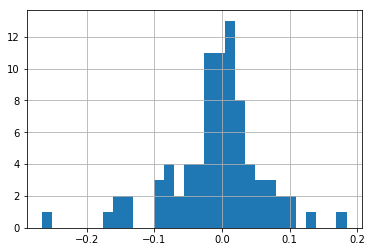

In [60]:
residuals = y_test-rf_aware.predict(X_test)
pd.Series(residuals).hist(bins=30)

### Consideration

In [109]:
df_cons = df.drop(axis=1, columns=['aware', 'purch']).dropna()
X = df_cons.drop(axis=1, columns=['cons'])
y_cons = df_cons['cons']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cons, test_size=0.2, random_state=42)

In [111]:
params = [{
    'n_estimators': [40, 45, 50],
    'max_depth': [15, 25, 35],
    'max_features': ['auto'] 
}]

rf_cons = RandomForestRegressor(random_state=42)
rf_grid_cons = GridSearchCV(rf_cons, params)
rf_grid_cons.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=42, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [40, 45, 50], 'max_depth': [15, 25, 35], 'max_features': ['auto']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [112]:
pd.DataFrame(rf_grid_cons.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.064960,0.000318,0.579818,0.982805,15,auto,40,"{'max_depth': 15, 'max_features': 'auto', 'n_e...",1,0.721958,0.977165,0.635703,0.987654,0.379254,0.983595,0.007601,0.000450,0.145271,0.004319
1,0.059624,0.000000,0.578247,0.982944,15,auto,45,"{'max_depth': 15, 'max_features': 'auto', 'n_e...",6,0.721712,0.977304,0.633393,0.987795,0.377089,0.983735,0.004567,0.000000,0.145882,0.004319
2,0.073339,0.000334,0.577437,0.982993,15,auto,50,"{'max_depth': 15, 'max_features': 'auto', 'n_e...",7,0.721751,0.977352,0.631943,0.987843,0.376069,0.983783,0.007677,0.000473,0.146178,0.004319
3,0.062292,0.000334,0.579818,0.982805,25,auto,40,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",1,0.721958,0.977165,0.635703,0.987654,0.379254,0.983595,0.010145,0.000473,0.145271,0.004319
4,0.067716,0.000000,0.578250,0.982944,25,auto,45,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",4,0.721712,0.977304,0.633402,0.987795,0.377089,0.983735,0.007367,0.000000,0.145884,0.004319
5,0.063041,0.000000,0.577423,0.982993,25,auto,50,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",8,0.721751,0.977352,0.631902,0.987844,0.376069,0.983783,0.012311,0.000000,0.146173,0.004319
6,0.057628,0.000378,0.579818,0.982805,35,auto,40,"{'max_depth': 35, 'max_features': 'auto', 'n_e...",1,0.721958,0.977165,0.635703,0.987654,0.379254,0.983595,0.008250,0.000535,0.145271,0.004319
7,0.055296,0.000000,0.578250,0.982944,35,auto,45,"{'max_depth': 35, 'max_features': 'auto', 'n_e...",4,0.721712,0.977304,0.633402,0.987795,0.377089,0.983735,0.008470,0.000000,0.145884,0.004319
8,0.066184,0.000335,0.577423,0.982993,35,auto,50,"{'max_depth': 35, 'max_features': 'auto', 'n_e...",8,0.721751,0.977352,0.631902,0.987844,0.376069,0.983783,0.005200,0.000473,0.146173,0.004319


In [113]:
rf_cons = rf_grid_cons.best_estimator_

In [114]:
rmse_cons = mean_squared_error(y_test, rf_cons.predict(X_test))**0.5
rmse_cons

0.06767470385269236

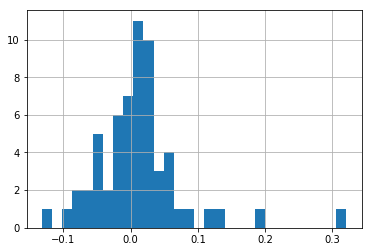

In [115]:
residuals = y_test-rf_cons.predict(X_test)
pd.Series(residuals).hist(bins=30)

### Purchase

In [116]:
df_purch = df.drop(axis=1, columns=['aware', 'cons']).dropna()
X = df_purch.drop(axis=1, columns=['purch'])
y_purch = df_purch['purch']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y_purch, test_size=0.2, random_state=42)

In [123]:
params = [{
    'n_estimators': [225, 250, 275],
    'max_depth': [20, 25],
    'max_features': ['auto'] 
}]

rf_purch = RandomForestRegressor(random_state=42)
rf_grid_purch = GridSearchCV(rf_purch, params)
rf_grid_purch.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [225, 250, 275], 'max_depth': [20, 25], 'max_features': ['auto']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [124]:
pd.DataFrame(rf_grid_purch.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.373433,0.015628,0.719536,0.948013,20,auto,225,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",1,0.796631,0.951019,0.752307,0.947281,0.608450,0.945739,0.022277,0.000002,0.080193,0.002217
1,0.331852,0.005209,0.717790,0.947928,20,auto,250,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",5,0.797887,0.950751,0.754183,0.947203,0.600005,0.945831,0.008230,0.007367,0.084734,0.002073
2,0.407141,0.015637,0.718439,0.948638,20,auto,275,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",3,0.799258,0.951569,0.756432,0.948121,0.598306,0.946226,0.036578,0.000015,0.086275,0.002212
3,0.314082,0.014432,0.718778,0.948260,25,auto,225,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",2,0.796601,0.951285,0.752194,0.947512,0.606302,0.945983,0.051221,0.001698,0.081152,0.002228
4,0.370848,0.015432,0.717050,0.948206,25,auto,250,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",6,0.797823,0.951144,0.753990,0.947429,0.598029,0.946046,0.041996,0.000277,0.085596,0.002153
5,0.385705,0.010418,0.717848,0.948879,25,auto,275,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",4,0.798777,0.951892,0.756254,0.948290,0.597187,0.946454,0.023193,0.007367,0.086614,0.002259


In [125]:
rf_purch = rf_grid_purch.best_estimator_

In [126]:
rmse_purch = mean_squared_error(y_test, rf_purch.predict(X_test))**0.5
rmse_purch

0.07674622305562932

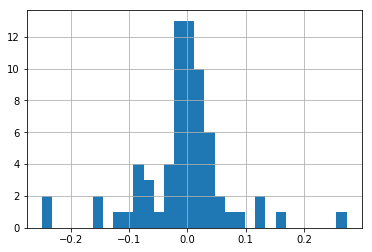

In [127]:
residuals = y_test-rf_purch.predict(X_test)
pd.Series(residuals).hist(bins=30)

### Save Models

In [128]:
from sklearn.externals import joblib

joblib.dump(rf_aware, r'C:\Users\william.raikes\Programming\Python\Creative_Elements_App\model_building\pickled_models\rf_aware_creative_rate.pkl') 
joblib.dump(rf_cons, r'C:\Users\william.raikes\Programming\Python\Creative_Elements_App\model_building\pickled_models\rf_cons_creative_rate.pkl') 
joblib.dump(rf_purch, r'C:\Users\william.raikes\Programming\Python\Creative_Elements_App\model_building\pickled_models\rf_purch_creative_rate.pkl') 

['C:\\Users\\william.raikes\\Programming\\Python\\Creative_Elements_App\\model_building\\pickled_models\\rf_purch_creative_rate.pkl']

### Test Prediction 

See how well it does with real scenarios, not just metric scores.

In [27]:
rf_aware.predict(df.iloc[100, 3:]), rf_cons.predict(df.iloc[100, 3:]), rf_purch.predict(df.iloc[100, 3:])

c:\users\william.raikes\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\william.raikes\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\william.raikes\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.resh

(array([0.70469562]), array([0.2635927]), array([0.28786065]))